# Steam Game Popularity vs Platform Support

by Lawrence Menefee

## Introduction

As both gaming console technology and video game graphics have improved over time, generational differences in this hardware and software performance are becoming less and less noticable. With the launches of the the Playstation 5 and the Xbox Series X/S, many consumers have begun to notice that the "next gen" games feel quite similar to the "last gen" games. With Microsoft and Sony now supporting backwards compatability for their consoles, the need for a new console every ~6 years begins to come into question. With consoles prices from 300 to 500 dollars, it becomes hard to imagine what the next generation console can add to be worth such an investment.

Nintendo has cemented itself as the master of the console exclusive - if you want to play a Nintento game, you have to have the Nintendo console that game was made for. However, Sony and Microsoft have not done the same. Aside from a small number of console exclusives, if you want to play the newest non-Nintendo video games, you probably don't need to buy the newest Playstation or Xbox to do so. The big name games of the year are often both the ones requiring the highest power hardware and the ones which are console exclusive. However, game developers are losing incentive to make their games console exclusives. Over the past few years, game revenue for PC vs console has been just about [equal](https://www.wepc.com/statistics/pc-gaming/). Although these two audiences are non-exclusive, having a game listed on both PC and console gives game developers a significantly larger audience. Most consoles now support cross-saves so a player can own a game on both PC and console and move between the same save file on both, enticing even the cross-section between the PC and console crowds to make multiple game purchases. Unless console producers shell out large ammounts of money to lock down a significant number of console exclusive games, it seems as if the future is shifting towards PC gaming.

Over the last 8 years, the worldwide gaming market value has [more than doubled](https://www.statista.com/statistics/292056/video-game-market-value-worldwide). Around half of all gaming revenue comes from mobile games, with console and PC games splitting the other half. Apple, looking for the largest slice of the pie, is investing greatly in mobile gaming. Consequently, Apple has not vested any interest in the PC gaming space recently. In fact, PC gaming has become almost synonomous with Windows gaming.  Steam, the largest distributer of PC games, owns 50-70% of the market for downloadable PC games. According to the [Steam Hardware and Software Survey](https://store.steampowered.com/hwsurvey/Steam-Hardware-Software-Survey-Welcome-to-Steam?platform=combined), only 3.37% of Steam users are also MacOS users as of November 2020. As a member of this minority, I have found it increasingly difficult to play even the simplest of PC games on my Mac, as Apple dropped support for 32-bit apps with the release of MacOS Catalina. Most PC games available for MacOS are ports of Windows versions of the games, and these seem to be few and far between. As PC gaming becomes more and more popular, many new consumers may begin to lean towards a Windows machine when it comes to picking a laptop or new PC. In this project, I want to explore data from Steam to see if MacOS support is really dissapearing from PC gaming completely.

## Data Collection

Data for this project originally came from two places. [SteamSpy](https://steamspy.com) provides user based Steam Data via its [API](https://steamspy.com/api.php). Steam has its own [API](https://steamcommunity.com/dev) which is not very user-friendly for accessing their game data. I reccomend using other Steam API tools like [steamapis](https://steamapis.com) if you wish to replicate this project. I have omitted the scrape both for brevity and for its lack of good resultant data.

I ran this project from my Macbook Pro in my college dorm with shotty wifi. Due to some HTTPS connection errors, the scrape was not complete. Only 3598 complete entries were able to be obtained from collecting data from SteamSpy and Steam, then merging the two sets. I still cleaned all of this data then ran a version of the project using it (with not very meaningful results). This version is currently on my git if you are interested in seeing it. 

For this version of this project, I am using data collected by Nik Davis in May 2019 instead in order to obtain more meaningful insights. His data has 27075 consistent data points. His work can be found [here](https://www.kaggle.com/nikdavis/steam-store-games)

In [59]:
import requests
import json
import pandas as pd
import numpy as np
import re
import os

In [60]:
#Converting Nik Davis' data from a csv file to a dataframe
master_df = pd.read_csv('steam.csv')
master_df.head()
#len(master_df)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## Data Cleaning

In this project I am only trying to analyze certain aspects of these games in relation to platform, so many of the columns can be dropped.

In [61]:
#dropping columns which are not useful
master_df.drop(labels=['appid','english','developer','publisher',
'required_age','categories','genres','steamspy_tags','achievements','positive_ratings',
'negative_ratings','average_playtime','median_playtime'],axis=1,inplace=True)

In [62]:
# sorting by popularity
master_df.sort_values(by='owners', inplace=True, ascending=False)
master_df.head()

,name,release_date,platforms,owners,price
25,Counter-Strike: Global Offensive,2012-08-21,windows;mac;linux,50000000-100000000,0.00
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,windows,50000000-100000000,26.99
258,Call of Duty®: Modern Warfare® 2,2009-11-11,windows;mac,5000000-10000000,19.99
2602,A Story About My Uncle,2014-05-28,windows;mac;linux,5000000-10000000,9.99
903,Borderlands 2,2012-09-20,windows;mac;linux,5000000-10000000,19.99


Platforms and release_date are currently in an unhashable format which is difficult to deal with. I will separate platforms into three different columns: 'windows', 'mac', and 'linux', which will have boolean values indicating if that game is available on that platform.

In [63]:
#creating boolean columns of platform availability
windows = []
mac = []
linux = []
for x in master_df['platforms']:
    windows.append('windows' in x)
    mac.append('mac' in x)
    linux.append('linux' in x)
master_df['windows'] = windows
master_df['mac'] = mac
master_df['linux'] = linux
master_df.drop('platforms', axis=1, inplace=True)
master_df.head()

,name,release_date,owners,price,windows,mac,linux
25,Counter-Strike: Global Offensive,2012-08-21,50000000-100000000,0.00,True,True,True
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,50000000-100000000,26.99,True,False,False
258,Call of Duty®: Modern Warfare® 2,2009-11-11,5000000-10000000,19.99,True,True,False
2602,A Story About My Uncle,2014-05-28,5000000-10000000,9.99,True,True,True
903,Borderlands 2,2012-09-20,5000000-10000000,19.99,True,True,True


I will change release_date be datetime objects.

In [64]:
#creating datetime objects for ease of access
import datetime
from datetime import date

dates = []
for x in master_df['release_date']:
    date_object = datetime.datetime.fromisoformat(x)
    dates.append(datetime.date(date_object.year,date_object.month,date_object.day))
master_df['release_date'] = dates
master_df.head()

,name,release_date,owners,price,windows,mac,linux
25,Counter-Strike: Global Offensive,2012-08-21,50000000-100000000,0.00,True,True,True
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,50000000-100000000,26.99,True,False,False
258,Call of Duty®: Modern Warfare® 2,2009-11-11,5000000-10000000,19.99,True,True,False
2602,A Story About My Uncle,2014-05-28,5000000-10000000,9.99,True,True,True
903,Borderlands 2,2012-09-20,5000000-10000000,19.99,True,True,True


Finally, owners is formatted as a string representing an estimated range of number of owners. I will split this into est_owners, which will be the max amount of owners minus the min amount of owners, and plus_minus which will be the range on either side of that value.

In [65]:
est_owners = []
plus_minus = []
for o_str in master_df['owners']:
    try:
        o_min = re.match(r'^(\d+)',o_str).group(1)
        o_max = re.match(r'^(\d+)-(\d+)$',o_str).group(2)
    except AttributeError:
        o_min = re.match(r'^(\d+)-(\d+)$',o_str)
        o_max = re.match(r'^(\d+)-(\d+)$',o_str)
    est_owners.append((int(o_min)+int(o_max))/2)
    plus_minus.append((int(o_max)-int(o_min))/2)
master_df['est_owners'] = est_owners
master_df['plus_minus'] = plus_minus
master_df.drop('owners',axis=1, inplace=True)
master_df.head()

,name,release_date,price,windows,mac,linux,est_owners,plus_minus
25,Counter-Strike: Global Offensive,2012-08-21,0.00,True,True,True,75000000.0,25000000.0
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,26.99,True,False,False,75000000.0,25000000.0
258,Call of Duty®: Modern Warfare® 2,2009-11-11,19.99,True,True,False,7500000.0,2500000.0
2602,A Story About My Uncle,2014-05-28,9.99,True,True,True,7500000.0,2500000.0
903,Borderlands 2,2012-09-20,19.99,True,True,True,7500000.0,2500000.0


Now our data is ready for analysis.

## Data Analysis

I will begin by simply seeing how many of the games are available for each platform. 

In [69]:
#separating all data by platform availability

import matplotlib.pyplot as plt
import matplotlib.axes as axes

mw = pd.DataFrame() #mac and windows compatable
lw = pd.DataFrame() #linux and windows compatable
ml = pd.DataFrame() #mac and linux compatable
mlw = pd.DataFrame() #mac, linux, and windows compatable
w = pd.DataFrame() #windows exclusive
m = pd.DataFrame() #mac exclusive
l = pd.DataFrame() #linux exclusive

plat_score = [] #platform score, discussed later
mac_count, linux_count, windows_count, all_count, ml_count, mw_count, lw_count = 0,0,0,0,0,0,0
for index, row in master_df.iterrows():
    if row['mac'] and row['linux'] and row['windows']:
        all_count+=1
        mlw = mlw.append(row)
        plat_score.append(7)
    elif row['mac'] and row['linux']:
        ml_count+=1
        ml = ml.append(row)
        plat_score.append(4)
    elif row['windows'] and row['linux']:
        lw_count+=1
        lw = lw.append(row)
        plat_score.append(6)
    elif row['windows'] and row['mac']:
        mw_count+=1
        mw = mw.append(row)
        plat_score.append(5)
    elif row['linux']:
        linux_count+=1
        l = l.append(row)
        plat_score.append(3)
    elif row['mac']:
        mac_count+=1
        m = m.append(row)
        plat_score.append(2)
    else:
        windows_count+=1
        w = w.append(row)
        plat_score.append(1)

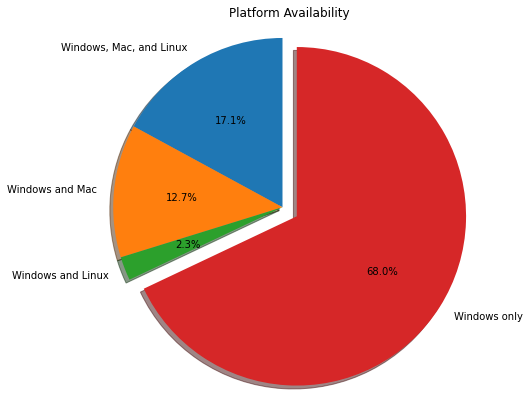

In [79]:
#creating pie graph of data 

labels = ['Windows, Mac, and Linux', 'Windows and Mac', 'Windows and Linux', 'Windows only']
sizes = [all_count, mw_count, lw_count, windows_count]
explode = (0,0,0,0.1) 

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Platform Availability')

plt.show()

From this sample of popular steam games, 68% are windows exclusive. 29.9% of games are available on Mac. Steam reports that only [3.37%](https://store.steampowered.com/hwsurvey/Steam-Hardware-Software-Survey-Welcome-to-Steam?platform=combined) of users are using MacOS. Perhaps the high rate of MacOS availability has to do with the popularity of these games. As of late, developers making a MacOS port of a game is seen as a selfless deed of fan service rather than something fans expect. Lets see how MacOS availability relates to game popularity.

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


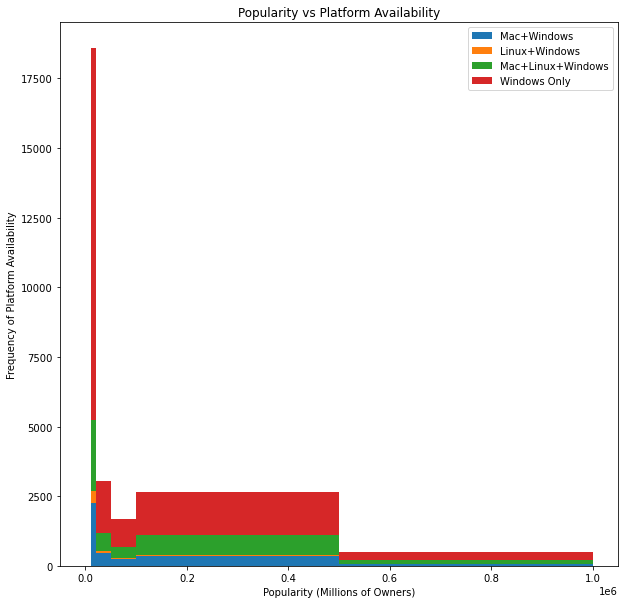

In [80]:
#plotting popularity vs platform availability
fig2, ax2 = plt.subplots(figsize=(10,10))
bins = [0,2000,5000,10000,20000,50000,100000,500000,1000000]
x = [mw['est_owners'].values, lw['est_owners'].values, mlw['est_owners'].values, w['est_owners'].values]
labels = ['Mac+Windows','Linux+Windows','Mac+Linux+Windows','Windows Only']
ax2.hist(x, bins = bins, density=False, histtype='bar', stacked=True, label=labels)
ax2.set_title('Popularity vs Platform Availability')
plt.legend()
plt.xlabel('Popularity (Millions of Owners)')
plt.ylabel('Frequency of Platform Availability')
plt.show()

From this visualization we learn that the least popular games on steam are often windows exclusive. I will try a different visualization to learn more about the relationship between popularity and platform support

To better visualize this data, I am creating a DataFrame column called plat_score. This platform score is as follows:
1 = windows exclusive,
2 = windows + mac,
3 = linux + mac,
4 = linux + mac + windows
Using this, I can create a set of boxplots showing the distribution of the popularity of the sampled games by platform. Because the range of the popularity data is so great, I will set the x axis to be logarithmic in scale.

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


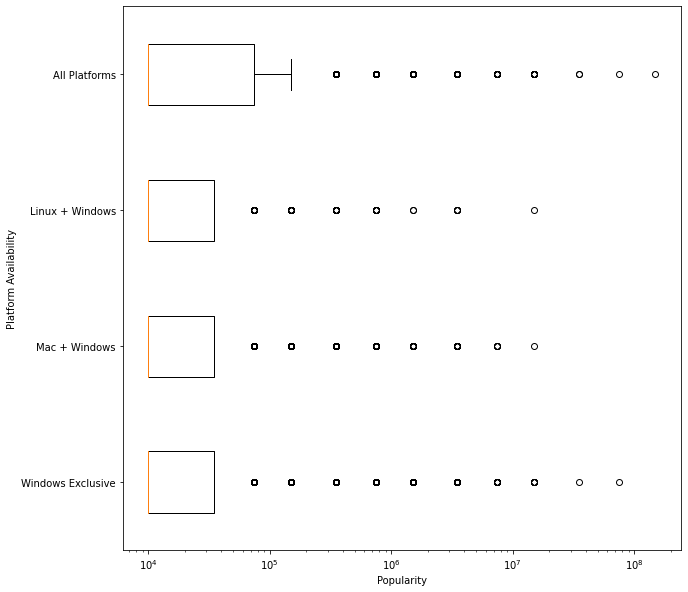

In [81]:
master_df['plat_score'] = plat_score
win_df = master_df[master_df['plat_score']==1]
macwin_df = master_df[master_df['plat_score']==5]
linwin_df = master_df[master_df['plat_score']==6]
maclinwin_df = master_df[master_df['plat_score']==7]
x = [win_df['est_owners'].values,macwin_df['est_owners'].values,
     linwin_df['est_owners'].values,maclinwin_df['est_owners'].values]
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.boxplot(x,notch=False,vert=False)
ax3.set_xscale('log')
ax3.set_yticklabels(labels=['Windows Exclusive', 'Mac + Windows', 'Linux + Windows', 'All Platforms'])
ax3.set_ylabel('Platform Availability')
ax3.set_xlabel('Popularity')
plt.show()

As seen in the above plot, games from this sample which are available on all platforms begin to slightly outperform their more limited counterparts in terms of popularity. This may support my theory that more popular games from companies with more money may add additional platform support for fan service. 

Next, I would like to explore if platform availability has been trending away from non-windows (towards windows exclusive) platforms over time.

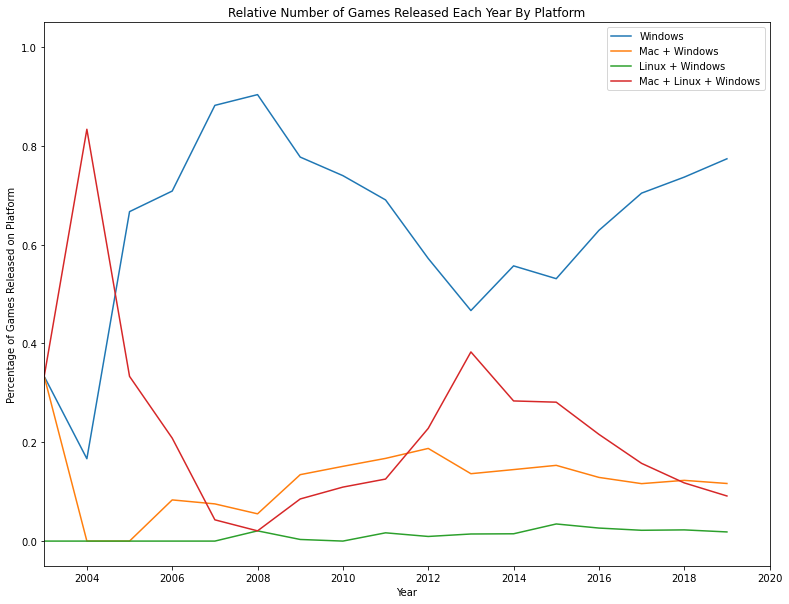

In [83]:
import matplotlib.dates 
years = []
for x in master_df['release_date']: #creating year of release column
    years.append(x.year)
master_df['years'] = years
win_df = master_df[master_df['plat_score']==1]
macwin_df = master_df[master_df['plat_score']==5]
linwin_df = master_df[master_df['plat_score']==6]
maclinwin_df = master_df[master_df['plat_score']==7]
x = np.sort(master_df['years'].unique()) # list of all years included in data
y_total = []
y_w, y_mw, y_mlw, y_lw = [], [], [], []
for v in x: #counting number of games released for each platform by year
    #weighting by total num games released that year
    weight_val = master_df['years'].values.tolist().count(v) 
    y_w.append(win_df['years'].values.tolist().count(v)/weight_val)
    y_mw.append(macwin_df['years'].values.tolist().count(v)/weight_val)
    y_lw.append(linwin_df['years'].values.tolist().count(v)/weight_val)
    y_mlw.append(maclinwin_df['years'].values.tolist().count(v)/weight_val)
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2003,2020)
plt.legend()
plt.show()

There is a clear visible trend towards Windows exclusivity over the past few years in terms of new game releases. Lets focus in on the past 7 years to see what is going on.

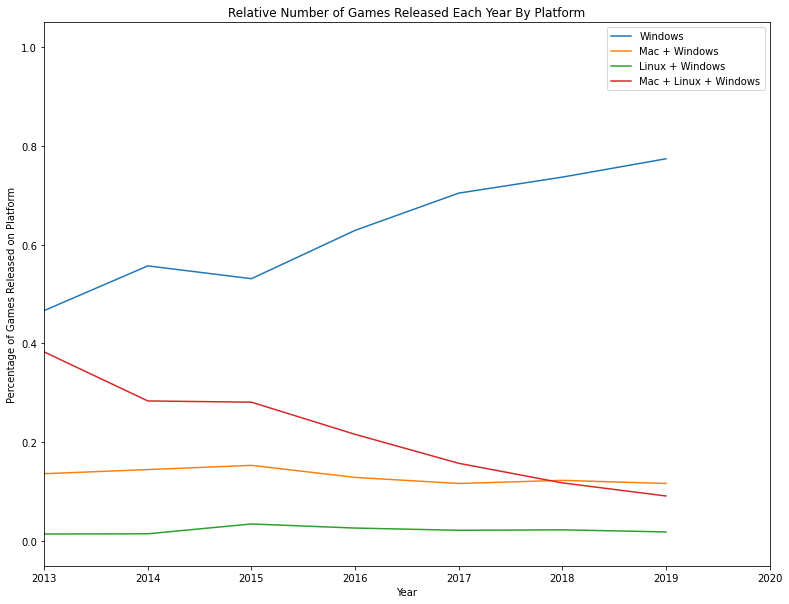

In [52]:
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2013,2020)
plt.legend()
plt.show()

There appears to be a linear downward trend over the past 7 years away from multiplatform releases on Steam. We can investigate further with a simple linear regressing using tools from scikit-learn.

In [53]:
#training linear model on multiplatform availability data
import sklearn as sk
import sklearn.linear_model
from sklearn.model_selection import train_test_split
X = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X[-7:], y_mlw[-7:], test_size=0.2)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train,y_train)
print(regr.intercept_)
print(regr.coef_)

100.83604753088208
[-0.04990591]


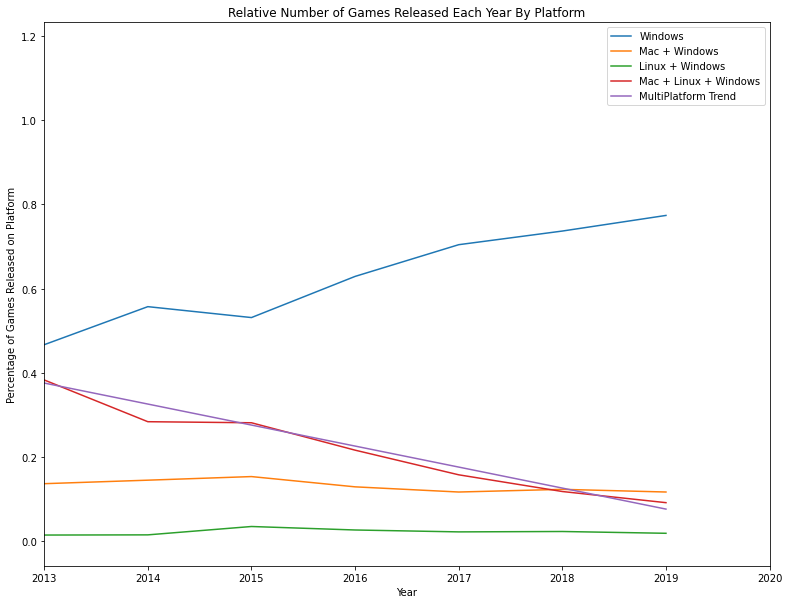

In [54]:
#plotting resultant line
fig4, ax4 = plt.subplots(figsize=(13,10))
ax4.plot(x,y_w, label = 'Windows')
ax4.plot(x,y_mw, label = 'Mac + Windows')
ax4.plot(x,y_lw, label = 'Linux + Windows')
ax4.plot(x,y_mlw, label = 'Mac + Linux + Windows')
ax4.plot(x,regr.intercept_+x*regr.coef_, label = 'MultiPlatform Trend')
ax4.set_ylabel('Percentage of Games Released on Platform')
ax4.set_xlabel('Year')
plt.title('Relative Number of Games Released Each Year By Platform')
plt.xlim(2013,2020)
plt.legend()
plt.show()

In [55]:
# model error testing
from sklearn import metrics
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02503799542634917
Mean Squared Error: 0.0009123757027677887
Root Mean Squared Error: 0.030205557481493183


All errors are very low. The trend for this data set is quite linear. Lets see what would happen if this trend were to continue for the next few years.

In [56]:
X_test = np.array([2020,2021,2022]).reshape(-1,1)
y_pred = regr.predict(X_test)
print(y_pred)

[ 0.02609978 -0.02380613 -0.07371205]


If this trend were to continue as it is, multi-platform listings will be no more in within the next three years. 

## Insight

The trend over the past 7 years has been extremely linear for this dataset. Newly listed games are trending towards being exclusively Windows based. Sure, MacOS or Linux ports can be released years after a game's initial release, but incentive for developers is extremely low as the Steam user base is nearly all Windows users. As this goes on, Apple continues to invest in mobile gaming while divesting in PC gaming. There is no indication that multi-platform listings result in a significant amount of revenue when taking into account the time and money that goes in to porting a game to a different OS. Meanwhile, Microsoft is seeking to capatalize on the rise of PC gaming. Although they are not attempting to create a Steam-like game distribution platform, Microsoft is investing in Microsoft Game Pass for PC, a Netflix-like service where you pay montly for access to their selection of PC games. Sony is making a similar move with PS Now. As these companies prepare to ride the rising wave of PC gaming, Apple appears to be abandoning this market completely to fully invest in mobile gaming.